### Importing required moudules

In [32]:
#Data preprocessing 
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek

#Data analysis
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
 
#ML algorithms
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix,classification_report

#Extra
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

### Setting enviornment 

In [2]:
def setEnviornment(seed):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    sns.set_style("dark")
    np.random.seed(seed)
setEnviornment(42)

### Loading data

In [6]:
file_path = 'C:\Data\Study\Ai_adventures\Projects\Deep _Learning\Android-Malware Detection\outputs\processed_data.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [7]:
X,y = data["features"], data["targets"]
X.shape, y.shape

((610492, 78), (610492,))

### Splitting data

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

### Model training 

- Batch training 

In [6]:
def batchTraining(model,batch_size=30000):
    num_batches = len(X_train) // batch_size
    scores = []
    for i in range(num_batches):
        start_index = i * batch_size
        end_index = (i + 1) * batch_size
        X_batch = X_train.iloc[start_index:end_index]
        y_batch = y_train.iloc[start_index:end_index]
        model.fit(X_batch, y_batch)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        scores.append(test_accuracy)
        print(f"BATCH[{i+1}]: train score:{np.round(train_accuracy,5)} | test score:{np.round(test_accuracy,5)}")
    print(f"average_score:{np.mean(scores)}")

In [7]:
# # Logistic regression model
lr = LogisticRegression()
batchTraining(lr)

BATCH[1]: train score:0.89697 | test score:0.89798
BATCH[2]: train score:0.89504 | test score:0.89585
BATCH[3]: train score:0.89665 | test score:0.8975
BATCH[4]: train score:0.89502 | test score:0.89573
BATCH[5]: train score:0.89771 | test score:0.89846
BATCH[6]: train score:0.89599 | test score:0.89679
BATCH[7]: train score:0.89667 | test score:0.89739
BATCH[8]: train score:0.89655 | test score:0.89762
BATCH[9]: train score:0.89358 | test score:0.89439
BATCH[10]: train score:0.8923 | test score:0.89308
BATCH[11]: train score:0.89578 | test score:0.89659
BATCH[12]: train score:0.89555 | test score:0.89662
BATCH[13]: train score:0.89368 | test score:0.89452
BATCH[14]: train score:0.89548 | test score:0.89633
average_score:0.8963476844643986


In [8]:
# #Randomforest model
rf = RandomForestClassifier()
batchTraining(rf)

BATCH[1]: train score:0.99858 | test score:0.9983
BATCH[2]: train score:0.99854 | test score:0.99852
BATCH[3]: train score:0.99876 | test score:0.99853
BATCH[4]: train score:0.99849 | test score:0.9984
BATCH[5]: train score:0.99865 | test score:0.9986
BATCH[6]: train score:0.99877 | test score:0.99883
BATCH[7]: train score:0.99877 | test score:0.99869
BATCH[8]: train score:0.99861 | test score:0.99847
BATCH[9]: train score:0.99859 | test score:0.99857
BATCH[10]: train score:0.99866 | test score:0.9986
BATCH[11]: train score:0.99865 | test score:0.99862
BATCH[12]: train score:0.99862 | test score:0.99836
BATCH[13]: train score:0.99869 | test score:0.99854
BATCH[14]: train score:0.99883 | test score:0.99878
average_score:0.9985577628085328


In [9]:
# #gradient boosting model
gb = GradientBoostingClassifier()
batchTraining(gb)

BATCH[1]: train score:0.99771 | test score:0.99767
BATCH[2]: train score:0.99836 | test score:0.99844
BATCH[3]: train score:0.99798 | test score:0.99802
BATCH[4]: train score:0.99739 | test score:0.99749
BATCH[5]: train score:0.99745 | test score:0.99756
BATCH[6]: train score:0.99805 | test score:0.99801
BATCH[7]: train score:0.9975 | test score:0.99759
BATCH[8]: train score:0.99766 | test score:0.99768
BATCH[9]: train score:0.99777 | test score:0.99776
BATCH[10]: train score:0.99774 | test score:0.99777
BATCH[11]: train score:0.99804 | test score:0.9981
BATCH[12]: train score:0.99768 | test score:0.99771
BATCH[13]: train score:0.99746 | test score:0.99759
BATCH[14]: train score:0.99803 | test score:0.99806
average_score:0.9978159739664096


In [10]:
#Votingclassifier
vc = VotingClassifier(
    estimators=[("LogisticRegression",lr),("RandomForest",rf),("GradientBoosting",gb)],
    voting="hard")
vc

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('RandomForest', RandomForestClassifier()),
                             ('GradientBoosting',
                              GradientBoostingClassifier())])

In [11]:
batchTraining(vc)

BATCH[1]: train score:0.99791 | test score:0.99785
BATCH[2]: train score:0.99822 | test score:0.9983
BATCH[3]: train score:0.99817 | test score:0.99806
BATCH[4]: train score:0.99763 | test score:0.99766
BATCH[5]: train score:0.99796 | test score:0.99801
BATCH[6]: train score:0.99845 | test score:0.99848
BATCH[7]: train score:0.99805 | test score:0.99814
BATCH[8]: train score:0.99812 | test score:0.99811
BATCH[9]: train score:0.99797 | test score:0.99804
BATCH[10]: train score:0.99787 | test score:0.99799
BATCH[11]: train score:0.99825 | test score:0.99826
BATCH[12]: train score:0.99784 | test score:0.9978
BATCH[13]: train score:0.99738 | test score:0.99749
BATCH[14]: train score:0.9985 | test score:0.9985
average_score:0.998049586751074


All model expect logistic regression are giving good results, we will choose voting classifier coz it has all three estimators

- Stratified training 

In [13]:
strK = StratifiedKFold(7)
trainScore, testScore = [],[]
fold = 0
for train_index,test_index in strK.split(X,y):
    fold+=1
    X_train,y_train = X.iloc[train_index],y.iloc[train_index]
    X_test,y_test = X.iloc[test_index],y.iloc[test_index]
    vc.fit(X_train,y_train)
    y_pred = vc.predict(X_test)
    train_acc = vc.score(X_train,y_train)
    test_acc = accuracy_score(y_test,y_pred)
    print(f"Fold[{fold}]: train score:{train_acc} | test score:{test_acc}")
    trainScore.append(train_acc)
    testScore.append(test_acc)
train_score = np.mean(trainScore)
test_score = np.mean(testScore)
print(f"train score:{train_score} : test score:{test_score}")

Fold[1]: train score:0.9998165411119901 | test score:0.8779095099410645
Fold[2]: train score:0.999201190951672 | test score:0.998727253964432
Fold[3]: train score:0.9991094616829646 | test score:0.9992661644479608
Fold[4]: train score:0.9991897247930837 | test score:0.9993120291699632
Fold[5]: train score:0.9991362160530042 | test score:0.9995642851409767
Fold[6]: train score:0.9991362160530042 | test score:0.9996560145849815
Fold[7]: train score:0.9996349939516014 | test score:0.8880786121335122
train score:0.9993177635139029 : test score:0.9660734099118417


### Saving trained model

In [17]:
file_path = r'C:\Data\Study\Ai_adventures\Projects\Deep _Learning\Android-Malware Detection\models\voting.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(vc, file)

### Model evaluation 

In [3]:
file_path = r'C:\Data\Study\Ai_adventures\Projects\Deep _Learning\Android-Malware Detection\models\voting.pkl'
with open(file_path, 'rb') as file:
    vc_model = pickle.load(file)

In [4]:
vc_model

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('RandomForest', RandomForestClassifier()),
                             ('GradientBoosting',
                              GradientBoostingClassifier())])

In [10]:
#making predictions
y_pred = vc_model.predict(X_test)

In [25]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='BENIGN')
recall = recall_score(y_test, y_pred,pos_label='BENIGN')
f1 = f1_score(y_test, y_pred,pos_label='BENIGN')

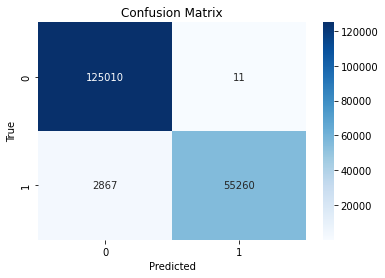

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9842859326883177
Precision: 0.977580018298834
Recall: 0.9999120147815167
F1 Score: 0.9886199179115691


In [35]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.98      1.00      0.99    125021
     MALWARE       1.00      0.95      0.97     58127

    accuracy                           0.98    183148
   macro avg       0.99      0.98      0.98    183148
weighted avg       0.98      0.98      0.98    183148

